In [28]:
from pyhamrds import bhoss
import os

#datadir = '/ccs/home/astrodoo/MEMW/BHOSS/BHOSS_CODE/outcomes/C3D2R512'
#data = 'GRRT_IMAGE_bhoss_data80.dat'

datadir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/f05_b1/inc90/BHOSS_CODE"
data = "f05_b1_sig1_i90_ph0_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_MADS41A93_121.dat"
#data = "Rh40_Rl1_sig1_i10_ph0_SgrA_Th_IMAGE_GRMHD_HAMR3D_SANEA93M_132.dat"
#datadir = "/lustre04/scratch/astrodoo/BHOSS_EHT_old/BHOSS_CODE"

bhdata = bhoss.read_image(os.path.join(datadir,data),silent=False,ifreq=2)  # Koushik's data - only 230GHz

===================================== header ==================================
width: 20.134000 Rg, offset: 0.000000 Rg, resolution: 400, Number of obs. freqs: 5
time: 9257.698128 Rg/c, inclination: 90.000000 deg, phi: 0.000000 deg, BH spin: 0.937500
Luminosity correction: 4.762071e+22, Jansky correction: 6.025933e-01, Micro Arcsecond correction: 5.029644e+00
Frequencies of intereset [GHz]: [  43.   86.  230.  345. 1360.]
All-freq image is included (3rd column in image data): False
length of data: 480000
xmin: -101.266842, xmax: 101.266842, ymin: -101.266842, ymax: 101.266842
intensity (min,max)= 0.0 0.00251827
Total flux = 2.079320 Jy at 230 GHz


===================================== header ==================================
width: 20.134000 Rg, offset: 0.000000 Rg, resolution: 400, Number of obs. freqs: 5
time: 9003.597816 Rg/c, inclination: 10.000000 deg, phi: 0.000000 deg, BH spin: 0.500000
Luminosity correction: 4.762071e+22, Jansky correction: 6.025933e-01, Micro Arcsecond correction: 5.029644e+00
Frequencies of intereset [GHz]: [  43.   86.  230.  345. 1360.]
All-freq image is included (3rd column in image data): False
480000
-101.26684243394799 101.26684243394799 -101.26684243394799 101.26684243394799
(zmin,zmax)= 0.0 9.49303e-05
Total flux = 1.922476 Jy at 43 GHz
722:53:59.289 - Start Program


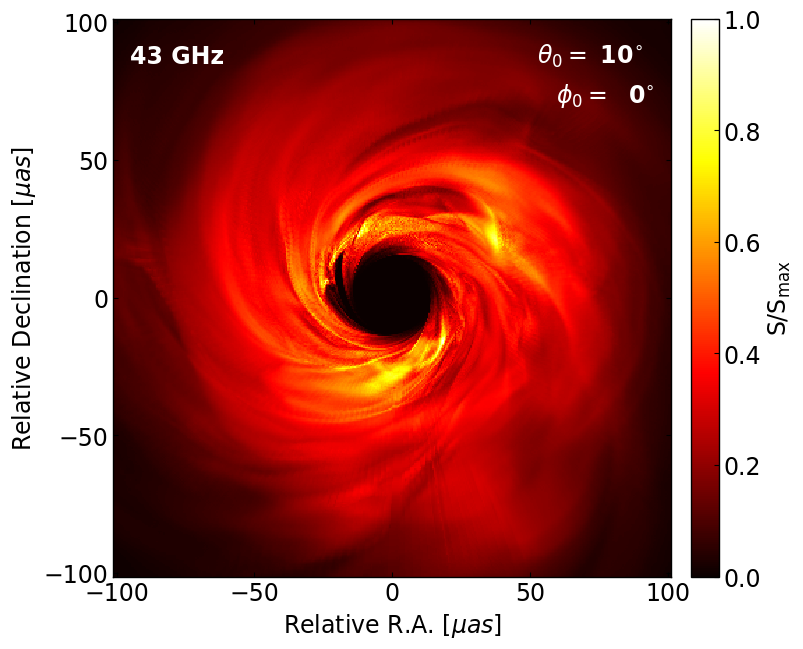

In [5]:
from pyhamrds import bhoss
import matplotlib.pyplot as plt
import os
%matplotlib inline

#datadir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh1/inc10/BHOSS_CODE"
#data = "Rh1_Rl1_sig1_i10_ph0_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_MADS41A5_331.dat"

filename  = os.path.join(datadir, data)

figdir = os.environ['PYTHONFIG']
#bhoss.show_image(filename,ifreq=10,cmap='hot',out=os.path.join(figdir,'bhoss_img_David512_201.png'))
bhoss.show_image(filename,ifreq=0,cmap='hot') # Koushik's data - only 230GHz

# Check Average Flux

In [29]:
import os
import numpy as np

#find average flux
def bhoss_avg(Te_model,sig,inclination,phi0,model_name, ifreq=2):

    note=""
    if (model_name == "MADS41A5"):
        model_str = "bhoss_MA05"
        ind_start = 311
        ind_end = 410
    elif (model_name == "MADS41A0"):
        model_str = "bhoss_MA0"
        ind_start = 97
        ind_end = 196
    elif (model_name == "MADS41A93"):
        model_str = "bhoss_MA93"
        ind_start = 96
        ind_end = 195
    elif (model_name == "MADS41A93M"):
        model_str = "bhoss_MA93M"
        ind_start = 101
        ind_end = 200
    elif (model_name == "SANEA93M"):
        model_str = "bhoss_SA93M"
        ind_start=132
        ind_end = 231
    elif (model_name == "SANEA93"):
        model_str = "bhoss_SA93"
        ind_start=99
        ind_end = 198
    elif (model_name == "SANEA05"):
        model_str = "bhoss_SA05"
        ind_start=900
        ind_end = 999
        note="192_"
    elif (model_name == "SANEA0"):
        model_str = "bhoss_SA0"
        ind_start=640
        ind_end = 739
    else:
        print("no model")
        return
    
    if ((inclination==10) | (inclination==30) | (inclination==50) | (inclination==70) | (inclination==90)):
        inc_str = "inc%d"%inclination
    else:
        print("no model")
        return
    
    basedir = "/lustre04/scratch/astrodoo/BHOSS_EHT"
    workdir = os.path.join(basedir,model_str,Te_model,inc_str,'BHOSS_CODE')
    print("work directory %s"%workdir)
    os.chdir(workdir)
    
    z_tot=np.zeros((ind_end-ind_start+1))
    time =np.zeros((ind_end-ind_start+1))
    ind  =np.zeros((ind_end-ind_start+1))
    
    file_path = os.getcwd()
    
    print("ifreq=%d: Should be checked if it is the correct freqency."%ifreq)
    for image_ind in range(ind_start,ind_end+1):
        data_name="%s_sig%d_i%d_ph%d_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_%s_%s%d.dat" \
        %(Te_model,sig,inclination,phi0,model_name,note,image_ind)
        filename  = os.path.join(file_path, data_name)
        
        header_1 = np.genfromtxt(filename, max_rows = 1)
        header_2 = np.genfromtxt(filename, skip_header = 1, max_rows = 1)
        header_3 = np.genfromtxt(filename, skip_header = 2, max_rows = 1)
        M           = int(header_1[2])
        Jansky_corr          = header_2[5]
        #ascii2 = np.loadtxt(filename, skiprows = 3, usecols = (0, 1, 2))
        ascii2 = np.loadtxt(filename, skiprows = 3, usecols = (0, 1, ifreq+2))
        data2=ascii2.reshape([M, M, 3])
        z    = data2[:,:,2]*Jansky_corr #convert to Jansky
        z_tot[image_ind-ind_start]=np.sum(z)
        
        ind[image_ind-ind_start] = image_ind
        time[image_ind-ind_start] = header_2[0]   # time
        
        print("%d, flux: %f at %f"%(image_ind,z_tot[image_ind-ind_start],time[image_ind-ind_start]))
        
    dscale = header_2[7]
    print(model_name+Te_model,"Average total flux =", np.sum(z_tot)/(ind_end-ind_start+1), \
          "Jy; density_scale=", dscale)
    return (ind,time,z_tot,dscale) 

In [30]:
ind,time,z_tot,dscale = bhoss_avg("f05_b1",1,10,0,"MADS41A93", ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/f05_b1/inc10/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
96, flux: 2.150872 at 9008.139053
97, flux: 2.086693 at 9017.844868
98, flux: 2.047239 at 9027.551100
99, flux: 2.035219 at 9038.646851
100, flux: 2.047862 at 9048.356431
101, flux: 2.036095 at 9058.061637
102, flux: 2.038085 at 9067.764826
103, flux: 2.019505 at 9077.464542
104, flux: 1.966647 at 9088.552963
105, flux: 1.908005 at 9098.254801
106, flux: 1.884228 at 9107.957635
107, flux: 1.877830 at 9117.659184
108, flux: 1.841487 at 9127.363548
109, flux: 1.821713 at 9138.452062
110, flux: 1.820823 at 9148.158890
111, flux: 1.829471 at 9157.868704
112, flux: 1.823262 at 9167.579583
113, flux: 1.816921 at 9178.672003
114, flux: 1.854176 at 9188.377169
115, flux: 1.908116 at 9198.079088
116, flux: 1.915087 at 9207.781556
117, flux: 1.872037 at 9217.482565
118, flux: 1.799425 at 9228.573654
119, flux: 1.791706 at 9238.281441
120, flux: 1.788075

In [31]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/f05_b1/inc10/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [32]:
import numpy as np
import os
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/f05_b1/inc10/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 96/195/100
average z_tot = 2.028315 Jy, the density scale = 1.000000e-18


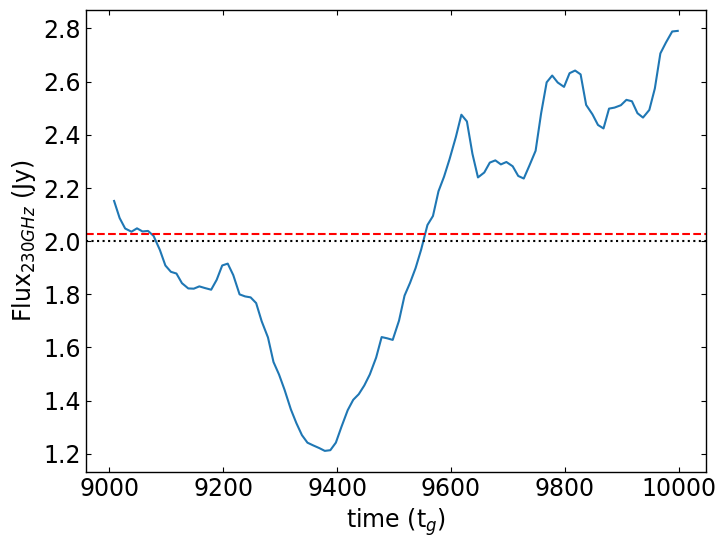

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [34]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

96:: 2.150872 Jy at 9008.139053
97:: 2.086693 Jy at 9017.844868
98:: 2.047239 Jy at 9027.551100
99:: 2.035219 Jy at 9038.646851
100:: 2.047862 Jy at 9048.356431
101:: 2.036095 Jy at 9058.061637
102:: 2.038085 Jy at 9067.764826
103:: 2.019505 Jy at 9077.464542
104:: 1.966647 Jy at 9088.552963
105:: 1.908005 Jy at 9098.254801
106:: 1.884228 Jy at 9107.957635
107:: 1.877830 Jy at 9117.659184
108:: 1.841487 Jy at 9127.363548
109:: 1.821713 Jy at 9138.452062
110:: 1.820823 Jy at 9148.158890
111:: 1.829471 Jy at 9157.868704
112:: 1.823262 Jy at 9167.579583
113:: 1.816921 Jy at 9178.672003
114:: 1.854176 Jy at 9188.377169
115:: 1.908116 Jy at 9198.079088
116:: 1.915087 Jy at 9207.781556
117:: 1.872037 Jy at 9217.482565
118:: 1.799425 Jy at 9228.573654
119:: 1.791706 Jy at 9238.281441
120:: 1.788075 Jy at 9247.990304
121:: 1.766672 Jy at 9257.698128
122:: 1.698281 Jy at 9267.401850
123:: 1.637292 Jy at 9278.487308
124:: 1.544878 Jy at 9288.189770
125:: 1.497904 Jy at 9297.894634
126:: 1.440450

In [35]:
ind,time,z_tot,dscale = bhoss_avg("f05_b1",1,50,0,"MADS41A93", ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/f05_b1/inc50/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
96, flux: 2.315757 at 9008.139053
97, flux: 2.246825 at 9017.844868
98, flux: 2.187813 at 9027.551100
99, flux: 2.147730 at 9038.646851
100, flux: 2.170408 at 9048.356431
101, flux: 2.146664 at 9058.061637
102, flux: 2.137041 at 9067.764826
103, flux: 2.109648 at 9077.464542
104, flux: 2.093197 at 9088.552963
105, flux: 2.053645 at 9098.254801
106, flux: 2.056413 at 9107.957635
107, flux: 2.064323 at 9117.659184
108, flux: 2.032985 at 9127.363548
109, flux: 2.019786 at 9138.452062
110, flux: 1.982849 at 9148.158890
111, flux: 1.940744 at 9157.868704
112, flux: 1.934313 at 9167.579583
113, flux: 1.991915 at 9178.672003
114, flux: 2.008709 at 9188.377169
115, flux: 1.999482 at 9198.079088
116, flux: 1.987577 at 9207.781556
117, flux: 1.939495 at 9217.482565
118, flux: 1.864726 at 9228.573654
119, flux: 1.864558 at 9238.281441
120, flux: 1.860398

In [36]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/f05_b1/inc50/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [37]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/f05_b1/inc50/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 96/195/100
average z_tot = 2.009612 Jy, the density scale = 9.330000e-19


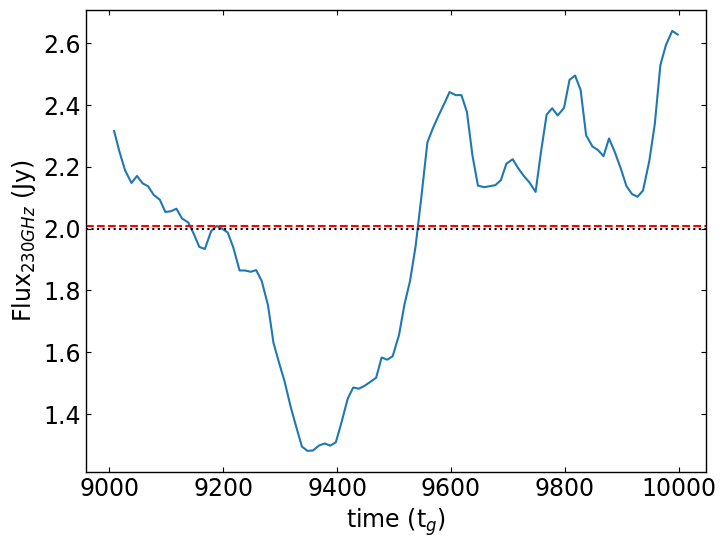

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [39]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

96:: 2.315757 Jy at 9008.139053
97:: 2.246825 Jy at 9017.844868
98:: 2.187813 Jy at 9027.551100
99:: 2.147730 Jy at 9038.646851
100:: 2.170408 Jy at 9048.356431
101:: 2.146664 Jy at 9058.061637
102:: 2.137041 Jy at 9067.764826
103:: 2.109648 Jy at 9077.464542
104:: 2.093197 Jy at 9088.552963
105:: 2.053645 Jy at 9098.254801
106:: 2.056413 Jy at 9107.957635
107:: 2.064323 Jy at 9117.659184
108:: 2.032985 Jy at 9127.363548
109:: 2.019786 Jy at 9138.452062
110:: 1.982849 Jy at 9148.158890
111:: 1.940744 Jy at 9157.868704
112:: 1.934313 Jy at 9167.579583
113:: 1.991915 Jy at 9178.672003
114:: 2.008709 Jy at 9188.377169
115:: 1.999482 Jy at 9198.079088
116:: 1.987577 Jy at 9207.781556
117:: 1.939495 Jy at 9217.482565
118:: 1.864726 Jy at 9228.573654
119:: 1.864558 Jy at 9238.281441
120:: 1.860398 Jy at 9247.990304
121:: 1.865851 Jy at 9257.698128
122:: 1.831432 Jy at 9267.401850
123:: 1.752653 Jy at 9278.487308
124:: 1.630478 Jy at 9288.189770
125:: 1.566556 Jy at 9297.894634
126:: 1.506286

In [40]:
ind,time,z_tot,dscale = bhoss_avg("f05_b1",1,90,0,"MADS41A93", ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/f05_b1/inc90/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
96, flux: 2.436041 at 9008.139053
97, flux: 2.333857 at 9017.844868
98, flux: 2.248878 at 9027.551100
99, flux: 2.226737 at 9038.646851
100, flux: 2.287569 at 9048.356431
101, flux: 2.193784 at 9058.061637
102, flux: 2.215390 at 9067.764826
103, flux: 2.226356 at 9077.464542
104, flux: 2.258899 at 9088.552963
105, flux: 2.175929 at 9098.254801
106, flux: 2.269432 at 9107.957635
107, flux: 2.320170 at 9117.659184
108, flux: 2.247473 at 9127.363548
109, flux: 2.187372 at 9138.452062
110, flux: 2.123537 at 9148.158890
111, flux: 2.114299 at 9157.868704
112, flux: 2.083135 at 9167.579583
113, flux: 2.160749 at 9178.672003
114, flux: 2.113601 at 9188.377169
115, flux: 2.147866 at 9198.079088
116, flux: 2.138776 at 9207.781556
117, flux: 2.083569 at 9217.482565
118, flux: 2.020775 at 9228.573654
119, flux: 2.088510 at 9238.281441
120, flux: 2.091354

In [41]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/f05_b1/inc90/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [42]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/f05_b1/inc90/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 96/195/100
average z_tot = 2.060517 Jy, the density scale = 8.650000e-19


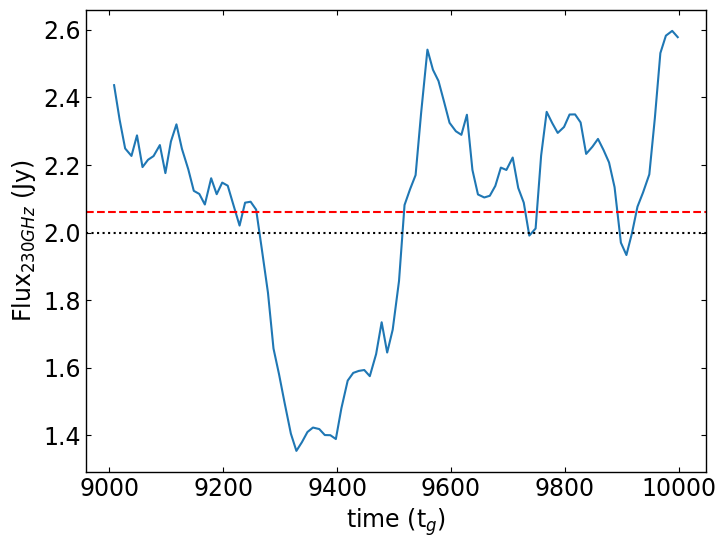

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [44]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

96:: 2.436041 Jy at 9008.139053
97:: 2.333857 Jy at 9017.844868
98:: 2.248878 Jy at 9027.551100
99:: 2.226737 Jy at 9038.646851
100:: 2.287569 Jy at 9048.356431
101:: 2.193784 Jy at 9058.061637
102:: 2.215390 Jy at 9067.764826
103:: 2.226356 Jy at 9077.464542
104:: 2.258899 Jy at 9088.552963
105:: 2.175929 Jy at 9098.254801
106:: 2.269432 Jy at 9107.957635
107:: 2.320170 Jy at 9117.659184
108:: 2.247473 Jy at 9127.363548
109:: 2.187372 Jy at 9138.452062
110:: 2.123537 Jy at 9148.158890
111:: 2.114299 Jy at 9157.868704
112:: 2.083135 Jy at 9167.579583
113:: 2.160749 Jy at 9178.672003
114:: 2.113601 Jy at 9188.377169
115:: 2.147866 Jy at 9198.079088
116:: 2.138776 Jy at 9207.781556
117:: 2.083569 Jy at 9217.482565
118:: 2.020775 Jy at 9228.573654
119:: 2.088510 Jy at 9238.281441
120:: 2.091354 Jy at 9247.990304
121:: 2.067972 Jy at 9257.698128
122:: 1.954394 Jy at 9267.401850
123:: 1.822045 Jy at 9278.487308
124:: 1.657208 Jy at 9288.189770
125:: 1.581311 Jy at 9297.894634
126:: 1.497427